In [ ]:
import warnings
# Configure warnings to always show them
warnings.filterwarnings('always')

# 1.Dziedziczenie

Dziedziczenie to kluczowy mechanizm programowania obiektowego, który umożliwia jednej klasie (zwanej klasą pochodną) przejąć atrybuty i metody innej klasy (zwanej klasą bazową).

## 1.1. Podstawy dziedziczenia

Aby zdefiniować klasę jako klasę pochodną od innej klasy, należy w definicji klasy podać nazwę klasy bazowej w nawiasach.

**Przykład**

W przykładzie, `DerivedClass` dziedziczy po `BaseClass`. Oznacza to, że obiekty klasy `DerivedClass` mają dostęp zarówno do własnych metod (takich jak `derived_method`), jak i metod klasy bazowej (`base_method`).

In [ ]:
class BaseClass:
    def __init__(self):
        self.base_attribute = "Wartość bazowa"
        print("konstruktor klasy bazowej")

    def base_method(self):
        return "Metoda z klasy bazowej"

class DerivedClass(BaseClass):
#dziedziczy konstruktor, metody i atrybuty z klasy bazowej

    def derived_method(self):
        return "Metoda z klasy pochodnej"

instancja=DerivedClass()
print(instancja.base_method())
print(instancja.derived_method())

konstruktor klasy bazowej
Metoda z klasy bazowej
Metoda z klasy pochodnej


## 1.2. Relacje *is-a* i *has-a*

### 1.2.1. Relacje *is-a*

Relacja "is-a" w języku Python odnosi się do dziedziczenia klas, gdzie jedna klasa (klasa pochodna) dziedziczy po innej klasie (klasie bazowej). Relacja ta oznacza, że klasa pochodna jest specjalnym przypadkiem klasy bazowej. Klasa pochodna przejmuje atrybuty i metody klasy bazowej, a także może definiować własne atrybuty i metody lub nadpisywać te odziedziczone.

Na przykład: *Car **is a** Vehicle* (Samochód jest Pojazdem) *Apple **is a** Fruit* (Jabłko jest Owocem) *Cat **is an** Animal* (Kot jest Zwierzęciem). Zatem, Car dziedziczy po Vehicle, Apple dziedziczy po Fruit itd.

**Co jest dziedziczone:**

* **Atrybuty Instancji**: Atrybuty instancji, które są definiowane w metodzie `__init__` lub innych metodach klasy bazowej, są dostępne w klasie pochodnej.

* **Metody:**  Wszystkie metody zdefiniowane w klasie bazowej są dziedziczone przez klasę pochodną, **chyba że zostaną nadpisane**.

* **Atrybuty i Metody Klasowe:** Atrybuty i metody, które są zdefiniowane na poziomie klasy (statyczne), są również dziedziczone.

**Ograniczenia dziedziczenia:**

* **Prywatne Atrybuty i Metody:**  Atrybuty i metody, które są oznaczone jako prywatne (poprzez użycie podwójnego podkreślenia, np. `__prywatny_atrybut`), nie są bezpośrednio dostępne w klasie pochodnej.**Można się do nich odwoływać tylko przez specjalne mechanizmy nazw (mangling).**

* **Nadpisywanie Metod:** Klasa pochodna może nadpisywać metody klasy bazowej. To oznacza, że jeśli klasa pochodna zdefiniuje metodę o tej samej nazwie, co metoda w klasie bazowej, to metoda z klasy bazowej zostanie zastąpiona.

* **Specjalne Metody:** Metody specjalne, takie jak `__init__`, `__str__`, `__repr__`, `__eq__`, itp., **mogą być nadpisywane w klasie pochodnej**, aby zmienić ich domyślne zachowanie.

**Zastosowania dziedziczenia**

* Ponieważ klasa potomna może dziedziczyć wszystkie funkcjonalności klasy rodzica, umożliwia to wielokrotne użycie kodu.
* Po opracowaniu funkcjonalności można ją odziedziczyć. Pozwala to na czystszy i łatwiejszy w utrzymaniu kod.
* Ponieważ możesz również dodawać własne funkcjonalności w klasie potomnej, tomożna dziedziczyć tylko przydatne funkcjonalności i definiować inne wymagane funkcje.


**Przykład**

In [ ]:
class Polygon:
    # Inicjalizujemy liczbę boków
    def __init__(self, no_of_sides):
        self.n = no_of_sides
        self.sides = [0 for i in range(no_of_sides)]

    def inputSides(self):
        self.sides = [float(input("Enter side "+str(i+1)+" : ")) for i in range(self.n)]

    # metoda wyświetlania długości każdego boku wielokąta
    def dispSides(self):
        for i in range(self.n):
            print("Side",i+1,"is",self.sides[i])

class Triangle(Polygon):
    # Zainicjowanie liczby boków trójkąta do 3
    # przez wywołanie metody __init__ klasy Polygon
    def __init__(self):
        Polygon.__init__(self,3)

    def findArea(self):
        a, b, c = self.sides

        # obbliczenie połowy obwodu
        s = (a + b + c) / 2

        # Wykorzystanie wzoru Herona do obliczenia pola trójkąta
        area = (s*(s-a)*(s-b)*(s-c)) ** 0.5
        print('The area of the triangle is %0.2f' %area)

# Tworzenie instancji klasy Triangle
t = Triangle()

# Użytkownik zostaje poprpszony o wprowadzenie boków trójkąta
t.inputSides()

# Wyświetlanie boków trójkąta
t.dispSides()

# Obliczanie i wyświetlanie pola trójkąta
t.findArea()

### 1.2.2. Relacje *has-a*

w Pythonie relacja "has-a" odnosi się do kompozycji lub agregacji, gdzie jedna klasa zawiera w sobie obiekty innej klasy jako swoje atrybuty. Jest to sposób na modelowanie związków między obiektami, gdzie jeden obiekt "posiada" inny obiekt.

**Kompozycja**

Kompozycja oznacza, że obiekt jest częścią innego obiektu i zazwyczaj jego istnienie jest zależne od istnienia obiektu nadrzędnego. Jest to tzw. silna relacja.

**Przykład**

W tym przykładzie klasa `Samochod` ma obiekt `Silnik` jako jeden ze swoich atrybutów. Relacja *has-a* oznacza, że samochód posiada silnik.

In [ ]:
class Silnik:
    def __init__(self, moc):
        self.moc = moc

    def uruchom(self):
        return "Silnik uruchomiony."

class Samochod:
    def __init__(self, marka, moc_silnika):
        self.marka = marka
        self.silnik = Silnik(moc_silnika)

    def jedz(self):
        return f"{self.silnik.uruchom()} Samochód {self.marka} jedzie."

# Tworzenie obiektu Samochod
samochod = Samochod("Toyota", 150)

# Używanie metod
print(samochod.jedz())  # Output: Silnik uruchomiony. Samochód Toyota jedzie.


**Agregacja**

Agregacja oznacza, że obiekt może istnieć niezależnie od obiektu nadrzędnego. Jest to tzw. słaba relacja.

**Przykład**

W tym przykładzie klasa `Samochod` posiada listę obiektów `Kolo`. Relacja "has-a" oznacza, że samochód posiada koła, ale koła mogą istnieć niezależnie od samochodu.

In [ ]:
class Kolo:
    def __init__(self, rozmiar):
        self.rozmiar = rozmiar

class Samochod:
    def __init__(self, marka, kola):
        self.marka = marka
        self.kola = kola

    def jedz(self):
        return f"Samochód {self.marka} jedzie na {len(self.kola)} kołach."

# Tworzenie obiektów Kolo
kolo1 = Kolo(16)
kolo2 = Kolo(16)
kolo3 = Kolo(16)
kolo4 = Kolo(16)

# Tworzenie obiektu Samochod z listą obiektów Kolo
samochod = Samochod("Toyota", [kolo1, kolo2, kolo3, kolo4])

# Używanie metod
print(samochod.jedz())  # Output: Samochód Toyota jedzie na 4 kołach.


Samochód Toyota jedzie na 4 kołach.


Bardziej przyjazną dla programisty jest relacja *has-a*, ponieważ pozwala ona uniknąć sporej ilości błędów w programach (wynikających z dziedziczenia), a jej zastosowanie ułatwia pielęgnację kodu. Ma ona jednak swoje ograniczenia:

Tak, relacja "has-a" w Pythonie **ma pewne ograniczenia dotyczące dostępności metod i atrybutów**, wynikające z zasad enkapsulacji i projektowania obiektowego.

* **Enkapsulacja i prywatność atrybutów**: W Pythonie można definiować atrybuty jako prywatne, używając podwójnego podkreślenia na początku nazwy atrybutu (`__atrybut`). **Prywatne atrybuty są dostępne tylko wewnątrz klasy, w której zostały zdefiniowane**, co ogranicza ich dostępność dla obiektów składowych.

* **Dostępność metod składowych**: **Metody obiektu składowego są dostępne tylko przez obiekt nadrzędny**, co może prowadzić do bardziej skomplikowanego kodu, zwłaszcza jeśli konieczne jest częste wywoływanie tych metod.

### 1.2.3. Zasada pojedynczej odpowiedzialności

"Zasada pojedynczej odpowiedzialności" (ang. *Single Responsibility Principl*e, SRP) to jeden z pięciu zasad SOLID w programowaniu obiektowym. Zasada ta mówi, że każda klasa lub moduł powinien mieć tylko jeden powód do zmiany, to znaczy, powinien istnieć tylko jeden aktor odpowiedzialny za zmianę klasy lub modułu.

W kontekście Pythona, SRP można stosować do klas, funkcji, modułów i innych jednostek kodu. Oznacza to, że każda jednostka powinna być odpowiedzialna tylko za jedno zadanie lub funkcjonalność. Jeśli klasa lub funkcja wykonuje więcej niż jedno zadanie, istnieje ryzyko, że zmiana jednego zadania może wpłynąć na inne, co prowadzi do trudności w utrzymaniu kodu i debugowaniu.

**Przykład zasady SRP w Pythonie może obejmować podział funkcji w klasie na mniejsze metody, które wykonują tylko pojedyncze zadania, a także dzielenie dużych klas na mniejsze, bardziej wyspecjalizowane klasy, które mają konkretną odpowiedzialność.**

## 1.3. Przesłanianie metod w dziedziczeniu

Przesłanianie metod w dziedziczeniu (ang. *method overriding)* to proces, w którym klasa pochodna definiuje metodę o tej samej nazwie co metoda w klasie bazowej. **Metoda w klasie pochodnej zastępuje (przesłania) metodę o takiej samej nazwie w klasie bazowej.**



**Przykład**

Przykład hierarchii dziedziczenia klas w Pythonie, gdzie definiowane są klasy reprezentujące różne rodzaje zwierząt. Wybrane klasy `Pies` i `Kot` dziedziczą po klasie bazowej `Zwierze` i **nadpisują** jej metodę `dzwiek()`.

In [ ]:
class Zwierze:
    def dzwiek(self):
        return "Nieokreślony dźwięk"

class Pies(Zwierze):
    def dzwiek(self):
        return "szczeka"

class Kot(Zwierze):
    def dzwiek(self):
        return "miauczy"

class Krowa(Zwierze):
    pass  # Krowa nie nadpisuje metody dzwiek, więc korzysta z implementacji z klasy bazowej

zwierzeta = [Pies(), Kot(), Krowa()]

for zwierze in zwierzeta:
    print(zwierze.dzwiek())

szczeka
miauczy
Nieokreślony dźwięk


## 1.4. Rozszerzanie funkcjonalności klasy bazowej - metoda `super()`

Klasa pochodna może nie tylko dziedziczyć metody i atrybuty klasy bazowej, ale również modyfikować je lub rozszerzać o nowe elementy.

**Przykład**

W podanym przykładzie funkcja `super(`) pozwala na wywołanie metod klasy bazowej, co jest szczególnie przydatne w konstruktorach i przy nadpisywaniu metod.

In [ ]:
class BaseClass:
    def __init__(self):
        self.base_attribute = "atrybut klasy bazowej"
        print("konstruktor klasy bazowej")

    def base_method(self):
        return "Metoda z klasy bazowej"

class DerivedClass(BaseClass):
    def __init__(self):
        super().__init__()  # Wywołanie konstruktora klasy bazowej
        self.derived_attribute = "atrybut klasy pochodnej"

    def base_method(self):
        result = super().base_method()  # Wywołanie metody klasy bazowej
        return result + " (rozszerzona w klasie pochodnej)"

instancja=DerivedClass()
print(instancja.base_attribute)
print(instancja.derived_attribute)
print(instancja.base_method())


konstruktor klasy bazowej
atrybut klasy bazowej
atrybut klasy pochodnej
Metoda z klasy bazowej (rozszerzona w klasie pochodnej)


**Przykład**

W przykładzie zdefiniowano dwie klasy: `Zwierz` i `Ptak`, gdzie `Ptak` dziedziczy po `Zwierz`. Klasa `Zwier`z zawiera atrybuty takie jak `gatunek`, `wiek` i `maksymalna prędkość`, a także statyczną listę `zwierzeta` przechowującą liczbę stworzeń każdego gatunku. Metoda `oblicz_odleglosc` oblicza, jaką odległość zwierzę pokona w danym czasie, bazując na swojej maksymalnej prędkości. Klasa `Ptak` rozszerza klasę `Zwier`z o dodatkowe atrybuty: `prędkość lotu` i `miejsce przebywania`, oferując metodę `przenies`, która zmienia lokalizację ptaka między `„otwartym”` miejscem a `„klatką”`. W przykładzie tworzony jest obiekt klasy `Ptak`, jego stan jest modyfikowany i wypisywany, ilustrując użycie dziedziczenia i metod zdefiniowanych w obu klasach.

In [ ]:
class Zwierz:
  """Pierwsza klasa"""
  rodzaj = "zwierzę"
  zwierzeta = {}

  def __init__(self, gatunek, wiek, predkosc):
    self.gatunek = gatunek
    self.wiek = wiek
    self.max_predkosc = predkosc
    if gatunek in Zwierz.zwierzeta:
      Zwierz.zwierzeta[gatunek] += 1
    else:
      Zwierz.zwierzeta[gatunek] = 1

  def oblicz_odleglosc(self, czas):
    print(f"{self.gatunek} w ciągu {czas} h przebedzie odleglosc {czas * self.max_predkosc} km")

  def wypisz_zwierzeta():
    print(Zwierz.zwierzeta)
    # nadpisuje zmienną specialną (zmiana działania polecenia print)

  def __str__(self):
    return self.gatunek + " ma " + str(self.wiek) + " lat i osiaga predkosc " + str(self.max_predkosc) + " km/h."

class Ptak(Zwierz):

  def __init__(self, gatunek, wiek, predkosc, max_predkosc_lotu, miejsce):
    # funkcja super() zwraca klasę Zwierz
    super().__init__(gatunek, wiek, predkosc)
    self.predkosc_lotu = max_predkosc_lotu
    self.miejsce = miejsce

  def przenies(self):
    if self.miejsce == "klatka":
      self.miejsce = "otwarty"
    else:
      self.miejsce = "klatka"

# deklaracja instancji klasy
p = Ptak("pingwin", 2, 3, 0, "otwarty")
print(p)

p.przenies()
print(p.miejsce)

p.przenies()
print(p.miejsce)

p.oblicz_odleglosc(10)

pingwin ma 2 lat i osiaga predkosc 3 km/h.
klatka
otwarty
pingwin w ciągu 10 godzin przebedzie odleglosc 30 km


## 1.5. Wielodziedziczenie

Python wspiera także wielodziedziczenie (in. dziedziczenie wielokrotne), co oznacza, że klasa może dziedziczyć po wielu klasach bazowych.

**WAŻNE:** Może prowadzić do skomplikowanych sytuacji, zwłaszcza gdy wiele klas bazowych definiuje te same metody.

W przypadku wielodziedziczenia, kolejność klas bazowych w definicji klasy jest ważna. Python szuka metod w klasach bazowych w kolejności, w jakiej są wymienione, dlatego w poniższym przykładzie wynikiem będzie `"Metoda z pierwszej klasy bazowej"`, ponieważ `FirstBase` jest wymienione przed `SecondBase`.

**Jeśli atrybut nie zostanie znaleziony w samej klasie, wyszukiwanie jest kontynuowane w klasie bazowej.** Powtarza się to rekurencyjnie, jeśli sama klasa bazowa pochodzi od innych klas.

**Przykład**

In [ ]:
class FirstBase:
    def my_method(self):
        return "Metoda z pierwszej klasy bazowej"

class SecondBase:
    def my_method(self):
        return "Metoda z drugiej klasy bazowej"

class MultiDerived(FirstBase, SecondBase):
    pass

instancja = MultiDerived()
print(instancja.my_method())

Metoda z pierwszej klasy bazowej


**Przykład**

W powyższym przykładzie klasa `Ba`t wywodzi się z dwóch superklas: `Mammal` i `WingedAnimal`. Tutaj używamy `b1` (obiekt `Ba`t), aby uzyskać dostęp do metod `mammal_info()` i winged_`animal_info(`) odpowiednio klasy `Mammal` i `WingedAnimal`.

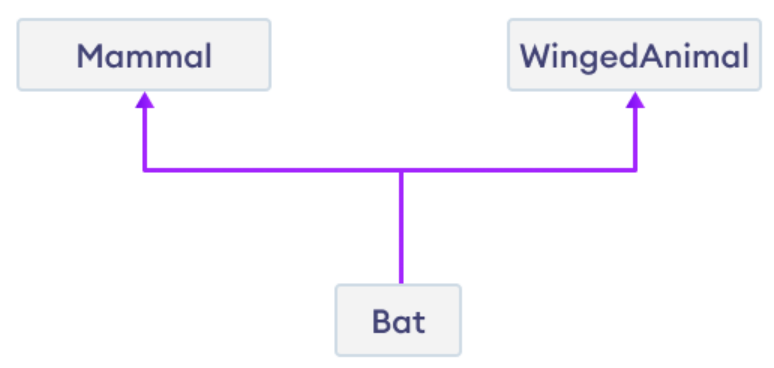

In [ ]:
# przykład

class Mammal:
    def mammal_info(self):
        print("I am mammal.")

class WingedAnimal:
    def winged_animal_info(self):
        print("I have wings.")

class Bat(Mammal, WingedAnimal):
    pass

# tworzymy obiekt klasy Bat
b1 = Bat()

b1.mammal_info()
b1.winged_animal_info()

## 1.6. Dziedziczenie wielopoziomowe

Dziedziczenie wielopoziomowe w Pythonie odnosi się do sytuacji, w której klasa dziedziczy zarówno z klasy bazowej, jak i z klasy pochodnej. Oznacza to, że jedna klasa może dziedziczyć zachowanie i właściwości zarówno z klasy nadrzędnej, jak i z klasy, która sama dziedziczy z innej klasy. W rezultacie hierarchia dziedziczenia tworzy strukturę drzewiastą, w której klasy są ułożone w kolejne poziomy.

In [ ]:
# Przykłąd dziedziczenia wielopoziomowego
class SuperClass:

    def super_method(self):
        print("Super Class method called")

# definijemy klasę dziedziczącą po SuperClass
class DerivedClass1(SuperClass):
    def derived1_method(self):
        print("Derived class 1 method called")

# definijemy klasę dziedziczącą po DerivedClass1
class DerivedClass2(DerivedClass1):

    def derived2_method(self):
        print("Derived class 2 method called")

# tworzymy obiekt klasy DerivedClass2
d2 = DerivedClass2()

d2.super_method()  # Output: "Super Class method called"

d2.derived1_method()  # Output: "Derived class 1 method called"

d2.derived2_method()  # Output: "Derived class 2 method called"

Super Class method called
Derived class 1 method called
Derived class 2 method called


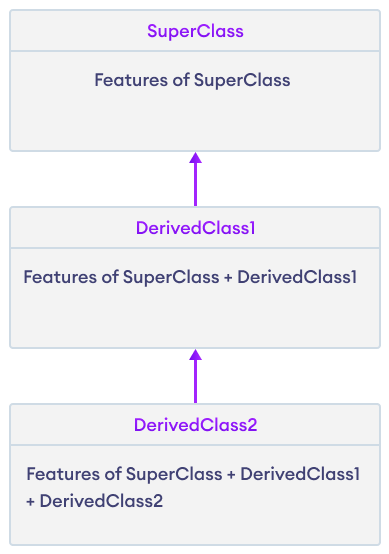

**Zalety dziedziczenia wielopoziomowego:**

* **Modularyzacja kodu:** Pozwala na logiczne grupowanie funkcjonalności i właściwości związanych tematycznie ze sobą.

* **Hierarchia zachowań:** Tworzy strukturę, w której klasy są ułożone w hierarchię, od bardziej ogólnych do bardziej szczegółowych, co ułatwia zarządzanie i zrozumienie kodu.

* **Ponowne wykorzystanie kodu:** Kod zdefiniowany w klasach nadrzędnych jest automatycznie dziedziczony przez klasy pochodne, co pozwala na ponowne wykorzystanie kodu bez konieczności jego duplikacji.

* **Elastyczność:** Dzięki dziedziczeniu wielopoziomowemu można łatwo dodawać nowe klasy pośrednie, rozszerzając hierarchię dziedziczenia i dostosowując zachowanie klas.

**Przykład:** klasy geometrii są zorganizowane w hierarchię dziedziczenia, gdzie klasy pochodne (np. Prostokat, Kolo, Kwadrat) dziedziczą i rozszerzają zachowanie klasy bazowej Figura, co pozwala na bardziej elastyczne i czytelne modelowanie różnych rodzajów kształtów geometrycznych.

In [ ]:
import math

class Figura:
    def oblicz_powierzchnie(self):
        pass

    def oblicz_obwod(self):
        pass

class Prostokat(Figura):
    def __init__(self, dlugosc, szerokosc):
        self.dlugosc = dlugosc
        self.szerokosc = szerokosc

    def oblicz_powierzchnie(self):
        return self.dlugosc * self.szerokosc

    def oblicz_obwod(self):
        return 2 * (self.dlugosc + self.szerokosc)

class Kolo(Figura):
    def __init__(self, promien):
        self.promien = promien

    def oblicz_powierzchnie(self):
        return math.pi * self.promien ** 2

    def oblicz_obwod(self):
        return 2 * math.pi * self.promien

class Kwadrat(Prostokat):
    def __init__(self, bok):
        super().__init__(bok, bok)

# Tworzenie obiektów
prostokat = Prostokat(5, 10)
kolo = Kolo(3)
kwadrat = Kwadrat(4)

# Wywoływanie metod
print("Prostokąt:")
print("Powierzchnia:", prostokat.oblicz_powierzchnie())  # Output: 50
print("Obwód:", prostokat.oblicz_obwod())               # Output: 30

print("\nKoło:")
print("Powierzchnia:", kolo.oblicz_powierzchnie())      # Output: ok. 28.27 (dla pi=3.14)
print("Obwód:", kolo.oblicz_obwod())                    # Output: ok. 18.85 (dla pi=3.14)

print("\nKwadrat:")
print("Powierzchnia:", kwadrat.oblicz_powierzchnie())   # Output: 16
print("Obwód:", kwadrat.oblicz_obwod())                 # Output: 16


Prostokąt:
Powierzchnia: 50
Obwód: 30

Koło:
Powierzchnia: 28.274333882308138
Obwód: 18.84955592153876

Kwadrat:
Powierzchnia: 16
Obwód: 16


## 1.6. Zadania

**Zadanie 1.1**

Zaprojektuj prosty system do zarządzania flotą pojazdów dla dużej firmy logistycznej, wykorzystując dziedziczenie w Pythonie. System powinien pozwalać na reprezentowanie różnych typów pojazdów, takich jak samochody osobowe, ciężarówki i motocykle.

1. Stwórz klasę bazową `Vehicle`:
* Klasa `Vehicle` powinna zawierać wspólne cechy wszystkich pojazdów:
** Atrybuty: `make` (marka), `model` (model), i `year` (rok produkcji).
** Metoda `describe_vehicle()`: która wydrukuje podstawowe informacje o pojeździe.

2. Stwórz klasy pochodne `Car`, `Truck`, i `Motorcycle`:
* Klasa `Car` powinna mieć dodatkowe cechy:
** Atrybuty: `doors` (liczba drzwi) i `passengers` (maksymalna liczba pasażerów).
** Metoda `describe_vehicl`e(): która powinna wykorzystać `describe_vehicle`() z klasy bazowej i dodać informacje o liczbie drzwi i pasażerach.
* Klasa `Truck` powinna mieć dodatkowe cechy:
** Atrybuty: `cargo_capacity` (ładowność w tonach).
** Metoda `describe_vehicle()`: która powinna wykorzystać `describe_vehicle()` z klasy bazowej i dodać informację o ładowności.
* Klasa Motorcycle powinna mieć dodatkowe cechy:
** Atrybuty: `has_sidecar` (informacja, czy motocykl posiada przyczepkę boczną, wartość `boolean`).
** Metoda `describe_vehicle()`: która powinna wykorzystać `describe_vehicle()` z klasy bazowej i dodać informację, czy motocykl posiada przyczepkę boczną.

**Testy:**

Utwórz obiekty dla każdego typu pojazdu z odpowiednimi szczegółami. Wywołaj metodę `describe_vehicle()` dla każdego obiektu, aby wyświetlić szczegóły pojazdu.

# 2.Hermetyzacja (enkapsulacja)

Hermetyzacja (enkapsulacja) to mechanizm programowania obiektowego, który łączy dane (atrybuty) i metody operujące na tych danych w jedną strukturę – klasę, jednocześnie ograniczając dostęp do niektórych komponentów klasy od zewnętrznego świata.

Hermetyzacja pomaga w utrzymaniu kodu, który jest bezpieczny (chroni dane przed nieautoryzowanym dostępem), łatwiejszy do testowania, a także mniej podatny na błędy spowodowane niezamierzoną interakcją z wewnętrznymi stanami obiektów.

Python obsługuje hermetyzację, dziedziczenie i polimorfizm. Jednym ze sposobów, w jaki Python implementuje hermetyzację, jest użycie modyfikatorów dostępu dla atrybutów i metod klas.

Prywatne i chronione pola w programowaniu obiektowym są ważnymi koncepcjami, które pomagają zapewnić hermetyzację i utrzymać integralność klasy. Hermetyzacja to koncepcja ukrywania wewnętrznych szczegółów obiektu i udostępniania światu zewnętrznemu tylko niezbędnych informacji. Dzięki temu klasa może być używana w przewidywalny i spójny sposób, nawet jeśli jej implementacja ulegnie zmianie. Korzystając z pól prywatnych i chronionych, programiści mogą kontrolować widoczność i dostępność atrybutów i metod klasy, zapobiegając przypadkowemu lub celowemu niewłaściwemu użyciu.

*Jednym z przykładów, w których ukrywanie wewnętrznych szczegółów może być przydatne, jest tworzenie klasy reprezentującej złożoną funkcję matematyczną. Rozważmy na przykład klasę reprezentującą funkcję wielomianową. Klasa mogłaby mieć prywatne pola dla współczynników wielomianu i publiczne metody do obliczania funkcji w określonym punkcie, znajdowania pochodnej lub wykreślania funkcji. Ukrywając wewnętrzną reprezentację wielomianu jako pola prywatne, użytkownik klasy musi tylko wiedzieć, jak wywołać metody publiczne i nie musi znać szczegółów dotyczących sposobu przechowywania wielomianu i manipulowania nim wewnętrznie. Sprawia to, że klasa jest łatwiejsza w użyciu i mniej podatna na błędy, ponieważ użytkownik nie może przypadkowo zmodyfikować wewnętrznej reprezentacji wielomianu w sposób, który spowodowałby nieoczekiwane wyniki.*

**Zakrywanie danych**

W Pythonie hermetyzację realizuje się przez ograniczenie dostępu do zmiennych i metod klasy. Chociaż Python nie obsługuje hermetyzacji w sposób ścisły (jak np. Java czy C++ przez modyfikatory dostępu takie jak `private`), konwencjonalnie przedrostek z podwójnym podkreśleniem `__` (np. `__nazwa_atrybutu`) oznacza, że element jest traktowany jako prywatny. **Taki atrybut nie jest dostępny bezpośrednio z zewnątrz klasy, co jest realizowane przez tzw. name mangling, gdzie interpreter zmienia nazwę atrybutu na `_NazwaKlasy__nazwa_atrybutu`**.

**Metody dostępowe**

Dostęp do prywatnych atrybutów jest zwykle realizowany przez publiczne metody, które nazywamy `getterami` i `setterami`. **Pozwalają one na kontrolowane odczytywanie i modyfikację wartości tych atrybutów.** Jest to szczególnie użyteczne, gdy chcemy zaimplementować dodatkową logikę walidacyjną przy zmianie wartości atrybutu.

Przykładowo, klasa przechowująca informacje o użytkowniku może mieć **prywatne atrybuty** takie jak `hasło`. Aby uzyskać dostęp do tego hasła, można użyć metody `get_password()`, która może implementować dodatkowe mechanizmy bezpieczeństwa (np. logowanie prób dostępu).

## 2.1.Atrybuty prywatne

W Pythonie atrybuty prywatne są oznaczane prefiksem z podwójnym podkreśleniem przed nazwą atrybutu (np. `__private_attribute`). Ideą atrybutów prywatnych jest to, że mogą być one dostępne tylko wewnątrz klasy i nie powinny być dostępne spoza klasy (także w klasach pochodnych). **Należy jednak pamiętać, że składnia z podwójnym podkreśleniem jest tylko konwencją, a nie ścisłą regułą.**

Gdy atrybut z prefiksem podwójnego podkreślenia jest przywoływany spoza klasy, nazwa atrybutu jest automatycznie zmieniana, aby zapobiec przypadkowemu dostępowi. Zmieniona nazwa jest tworzona przez dodanie prefiksu `"_ClassName"` do oryginalnej nazwy (np. `_ClassName__private_attribute`):

**Przykład**

In [ ]:
class Person:
    def __init__(self, name, age):
        self.__private_attribute = 'This is a private attribute.'
        self.name = name
        self.age = age

person = Person('John Doe', 30)
#próba uzyskania dostępu do prywatnego atrybutu spoza klasy skutkuje wyświetleniem błędu AttributeError.
print(person.__private_attribute)

AttributeError: 'Person' object has no attribute '__private_attribute'

Jednym ze sposobów uzyskania do niego dostępu, jeśli jest to konieczne, jest utworzenie metody (funkcji klasy, `getter`), która zwracałaby wartość `__private_attribute`:

In [ ]:
class Person:
    def __init__(self, name, age):
        self.__private_attribute = age
        self.name = name

    def get_private_attribute(self):
        return self.__private_attribute

person = Person('John Doe', 30)
print(person.get_private_attribute())  # 30


30


W tym przykładzie klasa Person ma prywatny atrybut `__private_attribute`, który przechowuje wiek osoby. Klasa posiada publiczną metodę `get_private_attribute', która zwraca wartość atrybutu prywatnego. Podczas próby uzyskania dostępu do atrybutu prywatnego bezpośrednio spoza klasy, zgłaszany jest błąd AttributeError, wskazujący, że atrybut nie jest dostępny. Chroni to atrybut prywatny przed przypadkową lub celową modyfikacją spoza klasy, zachowując integralność klasy.

## 2.2.Atrybuty chronione

Atrybuty chronione w Pythonie są oznaczane pojedynczym prefiksem podkreślenia przed nazwą atrybutu (np. `_protected_attribute`). Idea stojąca za atrybutami chronionymi jest podobna do atrybutów prywatnych, ponieważ nie powinny one być dostępne bezpośrednio spoza klasy. **Jednak w przeciwieństwie do atrybutów prywatnych, atrybuty chronione mogą być dostępne z poziomu klas pochodnych.**

**Przykład**

W tym przykładzie klasa `Employee` dziedziczy po klasie `Perso`n i może uzyskać dostęp do chronionego atrybutu za pomocą metody `display_protected_attribute`. Należy zauważyć, że `employee._protected_attribute` faktycznie drukuje przechowywaną w nim wartość. Mimo to Python wyświetli ostrzeżenie, że używany jest chroniony atrybut.

In [ ]:
class Person:
    def __init__(self, name, age):
        self._protected_attribute = 'This is a protected attribute. Class Person'
        self.name = name
        self.age = age


class Employee(Person):
    def display_protected_attribute(self):
        print(self._protected_attribute)


employee = Employee('Jane Doe', 25)
employee.display_protected_attribute()  # This is a protected attribute.
print(employee._protected_attribute)    # This is a protected attribute.

This is a protected attribute. Class Person
This is a protected attribute. Class Person


## 2.3.Metody prywatne

Podobnie jak atrybuty prywatne, metody prywatne w Pythonie są oznaczone prefiksem z podwójnym podkreśleniem przed nazwą metody (np. `__private_method`). Metody prywatne są przeznaczone do użycia tylko wewnątrz klasy i nie powinny być dostępne spoza klasy.

**Przykład**

Podobnie jak w przypadku atrybutów prywatnych, próba uzyskania dostępu do metod prywatnych spoza klasy skutkuje wyświetleniem błędu `AttributeError`.

In [ ]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def __private_method(self):
        print('This is a private method.')

person = Person('John Doe', 30)
#próba uzyskania dostępu do metody prywatej spoza klasy skutkuje wyświetleniem błędu AttributeError.
person.__private_method()        # AttributeError: 'Person' object has no attribute '__private_method'

AttributeError: 'Person' object has no attribute '__private_method'

## 2.4.Metody chronione

Metody chronione w Pythonie są oznaczane pojedynczym prefiksem podkreślenia przed nazwą metody (np. `_protected_metho`d). Metody chronione są przeznaczone do użycia w obrębie klasy i klasach pochodnych, ale nie poza nimi.

**Przykład**

In [ ]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def _protected_method(self):
        print('This is a protected method.')


class Employee(Person):
    def display_protected_method(self):
        self._protected_method()


employee = Employee('Jane Doe', 25)
employee.display_protected_method()  # This is a protected method.
employee._protected_method()         # This is a protected method.

This is a protected method.
This is a protected method.


W tym przykładzie klasa `Employee` dziedziczy po klasie `Person` i jest w stanie uzyskać dostęp do chronionej metody poprzez metodę display_protected_method. Podobnie jak w przypadku chronionych atrybutów, nadal można uzyskać dostęp do chronionych metod, ale Python wyświetli ostrzeżenie, że używany jest chroniony atrybut.

## 2.5.Zadania

**Zadanie 2.1.**

Napisz klasę `Computer`, która zilustruje podstawy enkapsulacji w języku Python. Klasa powinna posiadać prywatny atrybut `__maxprice`, który określa maksymalną cenę komputera. Klasa powinna również zawierać:

* Konstruktor (`__init__`), który inicjalizuje cenę maksymalną na 900.
* Metodę `sell`, która wyświetla aktualną cenę maksymalną.
* Metodę `setMaxPrice`, która pozwala zmienić wartość `__maxprice`.

**Testowanie**:

* Utwórz obiekt klasy `Computer` i wywołaj metodę `sell`, aby wyświetlić cenę.
* Spróbuj bezpośrednio zmodyfikować wartość `__maxprice` z zewnątrz klasy i wywołaj ponownie metodę `sell`, aby sprawdzić, czy zmiana zadziałała.
* Zmodyfikuj cenę za pomocą metody `setMaxPrice` i ponownie użyj metody `sell`, aby zobaczyć efekt.

**Zadanie 2.2.**

Napisz klasę `Circle`, która pozwoli na obliczanie i zarządzanie wartościami opisującymi geometrię koła. Klasa powinna mieć:

* Prywatny atrybut (`__radius`), który przechowuje promień koła. Promień powinien być zainicjalizowany przez konstruktor klasy.
* Metodę `get_radius` - getter, który pozwala odczytać wartość promienia.
* Metodę `set_radius` - setter, który pozwala ustawić nową wartość promienia, ale tylko jeśli jest ona nieujemna. W przypadku próby ustawienia wartości ujemnej, metoda powinna wyświetlić komunikat o błędzie.
* Metodę `area`, która oblicza i zwraca pole powierzchni koła (przyjąć przybliżenie 3.14i lub `math.pi`).

**Testowanie:**

* Utwórz obiekt klasy `Circle` z początkowym promieniem 5.
* Wywołaj metodę `area` dla tego obiektu i wydrukuj wynik.
* Spróbuj bezpośredniego dostępu do prywatnego atrybutu `__radius` i zobacz, jakie to spowoduje konsekwencje.
* Wykorzystaj `getter` do wydrukowania aktualnej wartości promienia.
* Spróbuj ustawić wartość promienia na ujemną za pomocą `settera` i obserwuj odpowiedź metody.

# 3.Przeciążanie operatorów

W Pythonie możemy zmienić sposób działania operatorów dla typów zdefiniowanych przez użytkownika. Na przykład operator `+` wykona dodawanie arytmetyczne na dwóch liczbach, scali dwie listy lub połączy dwa łańcuchy. **Funkcjonalność w Pythonie, która pozwala temu samemu operatorowi mieć różne znaczenie w zależności od kontekstu, nazywana jest przeciążaniem operatora.**

## 3.1. Funkcje specjalne

Funkcje klasy zaczynające się od podwójnego podkreślenia nazywane są w Pythonie funkcjami specjalnymi lub magicznymi. Funkcje specjalne są definiowane przez interpreter Pythona i używane do implementacji określonych funkcji lub zachowań. Nazywa się je funkcjami „podwójnego podkreślenia” (dunder, ang. *double underscore*), ponieważ mają podwójny przedrostek i sufiks podkreślenia, na przykład `__init()__` lub `__add()__`.

Niektóre ze specjalnych funkcji dostępnych w Pythonie:

* `__init__()` - inicjalizacja atrybutów obiektu
* `__str__() ` - zwraca tekstową reprezentację obiektu
* `__len__()` - zwraca długość obiektu
* `__add__()` - dodaje dwa obiekty
* `__call__()` - wywołuje obiekt jak funkcję

## 3.2. Operatory

W Pythonie istnieje kilka operatorów, które są powiązane ze specjalnymi funkcjami lub metodami, które definiują ich zachowanie. Te specjalne funkcje lub metody są wywoływane, gdy operator jest używany z obiektami określonej klasy. Jest to znane jako przeciążanie operatorów i pozwala zdefiniować niestandardowe zachowanie operatorów, gdy są one używane z obiektami własnych klas.

Oto kilka popularnych operatorów w Pythonie i powiązane z nimi specjalne funkcje lub metody:

1 **Operatory arytmetyczne**

* `+` (addition): `__add__`
* `-` (subtraction): `__sub__`
* `*` (multiplication): `__mul__`
* `/` (division): `__truediv__`
* `//` (floor division): `__floordiv__`
* `%` (modulus): `__mod__`
* `**` (exponentiation): __pow__

2 **Operatory bitowe**

* `&` (bitwise AND): `__and__`
* `|` (bitwise OR): `__or__`
* `^` (bitwise XOR): `__xor__`
* `~` (bitwise NOT): `__invert__`
* `<<` (left shift): `__lshift__`
* `>>` (right shift): `__rshift__`

3 **Operatory porówania**

* `<` (less than): `__lt__`
* `>` (greater than): `__gt__`
* `<=` (less than or equal to):` __le__`
* `>=` (greater than or equal to): `__ge__`
* `==` (equal to): `__eq__`
* `!=` (not equal to): __ne__

4 **Operatory jednoargumentowe**

* `+` (unary plus): `__pos__`
* `-` (unary minus): `__neg__`


5 **Rozszerzone operatory przypisania**

* `+=`: `__iadd__`
* `-=`: `__isub__`
* `*=`: `__imul__`
* `/=`: `__itruediv__`
* `//=`: `__ifloordiv_`_
* `%=`: `__imod__`
* `**=`: `__ipow__`


6 **Funkcje konwersji**

* `len()`: `__len__`
* `str()`: `__str__`
* `repr()`: `__repr__`


7 **Operatory kolekcyjne**

* `in`: `__contains__`
* `not in`: `__contains__` (inverted)

Te specjalne funkcje lub metody są zdefiniowane w klasie, a gdy użyjesz odpowiedniego operatora z obiektami tej klasy, Python automatycznie wywoła odpowiednią specjalną funkcję lub metodę, aby wykonać żądaną operację. Na przykład, jeśli zdefiniujesz klasę Vector i przeciążysz operator + definiując metodę add, możesz dodać dwa obiekty Vector używając funkcji

## 3.3. Zadania

**Zadanie 4.1**

Napisz klasę `Complex`, która będzie reprezentować liczby zespolone. Klasa powinna mieć:

* Atrybuty `real` i `imaginary`, które będą przechowywać część rzeczywistą i urojoną liczby zespolonej.
* Przeładowane operatory `+` i `*`, które umożliwią dodawanie i mnożenie dwóch liczb zespolonych.
* Wyniki dodawania i mnożenia powinny być w postaci liczby zespolonej, gdzie część rzeczywista i urojona są oddzielone znakiem `+`.

Przetestuj tak zdefiniowaną klasę.

**Przykłady testów**

In [ ]:
z1 = Complex(2, 3)
z2 = Complex(-1, 2)

# Dodawanie
z_sum = z1 + z2
print("Suma:", z_sum)  # Output: 1 + 5i

# Mnożenie
z_mul = z1 * z2
print("Iloczyn:", z_mul)  # Output: -8 + i

NameError: name 'Complex' is not defined

# 4.Polimorfizm

Polimorfizm jest koncepcją w programowaniu obiektowym, która pozwala na traktowanie obiektów różnych klas jako obiektów wspólnej nadklasy. W Pythonie polimorfizm jest osiągany poprzez nadpisywanie metod i przeciążanie operatorów.

* **Nadpisywanie metod**

W Pythonie nadpisywanie metod jest sposobem na zapewnienie konkretnej implementacji metody w klasie pochodnej, która jest już zdefiniowana w jej klasie bazowej. Jest to przykład **polimorfizmu runtime**. Gdy nadpisana metoda jest wywoływana z obiektu, Python określa, która wersja metody ma zostać wykonana w oparciu o rzeczywisty typ obiektu, a nie typ referencyjny.

In [ ]:
class Animal:
    def sound(self):
        print("The animal makes a sound.")

class Dog(Animal):
    def sound(self):
        print("The dog barks.")

class Cat(Animal):
    def sound(self):
        print("The cat meows.")

dog = Dog()
cat = Cat()

dog.sound()  # Output: The dog barks.
cat.sound()  # Output: The cat meows.

* **Przeciążanie operatorów**

Python pozwala na przeciążanie operatorów dla klas zdefiniowanych przez użytkownika. Osiąga się to poprzez zdefiniowanie specjalnych metod w klasie, które odpowiadają operatorowi, który ma zostać przeciążony. Jest to przykład **polimorfizmu w czasie kompilacji**.

**Przykład**: W tym przykładzie mamy klasę `Vector`, która reprezentuje wektor w dwuwymiarowej przestrzeni za pomocą współrzędnych `x` i `y`. Przeładowane operator metody `__add__` umożliwia dodawanie dwóch wektorów, co pozwala na naturalne zastosowanie operatora dodawania na obiektach klasy `Vector`

In [ ]:
class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Vector(self.x + other.x, self.y + other.y)

    def __str__(self):
        return f"({self.x}, {self.y})"

v1 = Vector(2, 3)
v2 = Vector(4, 5)

result = v1 + v2
print(result)  # Output: (6, 8)

(6, 8)


**Zadanie 4.1**

Napisz klasę `Complex`, która będzie reprezentować liczby zespolone. Klasa powinna mieć:

* Atrybuty `real` i `imaginary`, które będą przechowywać część rzeczywistą i urojoną liczby zespolonej.
* Przeładowane operatory `+` i `*`, które umożliwią dodawanie i mnożenie dwóch liczb zespolonych.

Przetestuj tak zdefiniowaną klasę.

In [ ]:
class Complex:
    def __init__(self, real, imaginary):
        self.real = real
        self.imaginary = imaginary

    def __str__(self):
        return f"{self.real} + {self.imaginary}i"

    def __add__(self, other):
        real_part = self.real + other.real
        imaginary_part = self.imaginary + other.imaginary
        return Complex(real_part, imaginary_part)

    def __mul__(self, other):
        real_part = self.real * other.real - self.imaginary * other.imaginary
        imaginary_part = self.real * other.imaginary + self.imaginary * other.real
        return Complex(real_part, imaginary_part)

z1 = Complex(2, 3)
z2 = Complex(-1, 2)

# Dodawanie
z_sum = z1 + z2
print("Suma:", z_sum)  # Output: 1 + 5i

# Mnożenie
z_mul = z1 * z2
print("Iloczyn:", z_mul)  # Output: -8 + i

Suma: 1 + 5i
Iloczyn: -8 + 1i
